<a href="https://colab.research.google.com/github/kalnikos/Document-Classification-/blob/main/Multinomial%20logistic%20regression%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import pickle
from zipfile import ZipFile
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
file_name = "/content/model_data.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [5]:
## Read the different data parts
path_df = "/content/model_data/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

path_X_train = "/content/model_data/X_train.pickle"
with open(path_X_train, 'rb') as data:
    X_train = pickle.load(data)

path_X_test = "/content/model_data/X_test.pickle"
with open(path_X_test, 'rb') as data:
    X_test = pickle.load(data)

path_y_train = "/content/model_data/y_train.pickle"
with open(path_y_train, 'rb') as data:
    y_train = pickle.load(data)

path_y_test = "/content/model_data/y_test.pickle"
with open(path_y_test, 'rb') as data:
    y_test = pickle.load(data)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1080, 293)
(121, 293)
(1080,)
(121,)


In [12]:
from sklearn.linear_model import LogisticRegression

## Base model
log_model = LogisticRegression(random_state=42)
print(log_model.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [13]:
## Fit the model
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Multinomial Logistic Regression

---

---





In [14]:
## Predictions
y_pred = log_model.predict(X_train)

## Train set accuracy
print("Accuracy:",accuracy_score(y_train, y_pred))

Accuracy: 0.937962962962963


In [16]:
## Check the cross validation scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_model, X_train, y_train, cv=10, scoring="accuracy")
scores

array([0.88888889, 0.86111111, 0.89814815, 0.84259259, 0.89814815,
       0.92592593, 0.87962963, 0.81481481, 0.89814815, 0.87962963])

## Hyper mapameters tuning
### We'll tune the following ones:

## C = Inverse of regularization strength. Smaller values specify stronger regularization.
## multi_class = We'll choose multinomial because this is a multi-class problem.
## solver: For multiclass problems, only newton-cg, sag, saga and lbfgs handle multinomial loss.
## class_weight: Weights associated with classes.
## penalty: Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties.

In [21]:
## Randomize grid search
# C
C = [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 10)]

# multi_class
multi_class = ['multinomial']

# solver
solver = ['newton-cg', 'sag', 'saga', 'lbfgs']
 
# class_weight
class_weight = ['balanced', None]

# penalty
penalty = ['l2']

# Create the random grid
parameters = {'C': C,
               'multi_class': multi_class,
               'solver': solver,
               'class_weight': class_weight,
               'penalty': penalty}

print(parameters)

{'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0], 'multi_class': ['multinomial'], 'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'], 'class_weight': ['balanced', None], 'penalty': ['l2']}


In [22]:
# Random search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

random_search = RandomizedSearchCV(estimator=log_model,
                                   param_distributions=parameters,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   24.6s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=42,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'C': [0.1, 0.2, 0.30000000000000004,
                                              0.4, 0.5, 0.6, 0.7000000000000001,
                                              0.8, 0.9, 1.0],
                                        'class_weight': ['balan

In [23]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'class_weight': 'balanced', 'C': 0.9}

The mean accuracy of a model with these hyperparameters is:
0.8777777777777778


In [25]:
## Grid search Cross Validation
from sklearn.model_selection import ShuffleSplit

C = [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 10)]
multi_class = ['multinomial']
solver = ['newton-cg']
class_weight = ['balanced']
penalty = ['l2']

param_grid = {'C': C,
               'multi_class': multi_class,
               'solver': solver,
               'class_weight': class_weight,
               'penalty': penalty}

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=log_model, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    3.1s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,
                               0.7000000000000001, 0.8, 0.9, 1.0],
                         'class_weight': ['balanced'],
                         'multi_class': ['multinomial'], 'penalty': ['

In [26]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'C': 0.9, 'class_weight': 'balanced', 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}

The mean accuracy of a model with these hyperparameters is:
0.8842203548085901


In [27]:
## Save the model
best_mlr = grid_search.best_estimator_
best_mlr

LogisticRegression(C=0.9, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=42, solver='newton-cg',
                   tol=0.0001, verbose=0, warm_start=False)

In [28]:
## Fit the model
best_mlr.fit(X_train, y_train)

LogisticRegression(C=0.9, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=42, solver='newton-cg',
                   tol=0.0001, verbose=0, warm_start=False)

In [29]:
## pedictions
y_pred = best_mlr.predict(X_train)

## Train set accuracy
print("Accuracy:",accuracy_score(y_train, y_pred))

Accuracy: 0.937962962962963


In [31]:
## test set predictions
test_pred = best_mlr.predict(X_test)

## test set accuracy
print("Test set Accuracy:",accuracy_score(y_test, test_pred))

Test set Accuracy: 0.8760330578512396


In [32]:
# Classification report
print("Classification report")
print(classification_report(y_test,test_pred))

Classification report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.75      0.90      0.82        10
           2       1.00      0.79      0.88        14
           3       0.80      0.86      0.83        14
           4       0.73      0.73      0.73        15
           5       1.00      0.87      0.93        15
           6       0.96      0.96      0.96        23
           7       0.93      1.00      0.97        14

    accuracy                           0.88       121
   macro avg       0.87      0.87      0.87       121
weighted avg       0.88      0.88      0.88       121



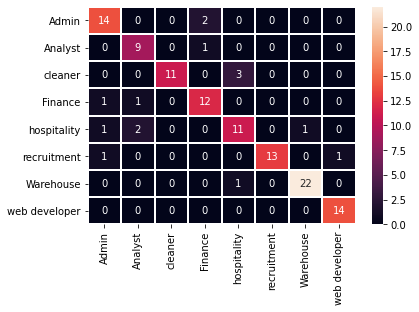

In [34]:
## Confusion matrix
encode = {'Admin':0, 'Analyst':1, 'cleaner':2, 'Finance':3, 'hospitality':4,
       'recruitment':5, 'Warehouse':6, 'web developer':7}
labels = [i for i in encode]
cf_matrix = confusion_matrix(y_test, test_pred)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

In [35]:
## Create a data freme with the model train, test set accuracy
D = {
     'Model': 'Multionomial Logistic Regression',
     'Train Set Accuracy': accuracy_score(y_train, best_mlr.predict(X_train)),
     'Test Set Accuracy': accuracy_score(y_test, test_pred)
}

mlr_df = pd.DataFrame(D, index=[0])
mlr_df

,Model,Train Set Accuracy,Test Set Accuracy
0,Multionomial Logistic Regression,0.937963,0.876033


In [37]:
## Save the model
with open('/content/model_data/best_mlr.pickle', 'wb') as output:
    pickle.dump(best_mlr, output)

## Save the data frame
with open('/content/model_data/mlr_df.pickle', 'wb') as output:
  pickle.dump(mlr_df, output)